#### 在磁性元件的设计与优化领域，磁芯损耗是一个核心指标，其大小直接关系到设备的效率与稳定性。在众多影响磁芯损耗的因素中，温度、励磁波形以及磁芯材料被公认为是最常见且比较重要的三大要素。为了精准提升磁性元件的性能，我们亟需依托实验数据，深入剖析这三者如何独立或协同作用于磁芯损耗，并探索实现最低损耗的最优条件。
##### 请根据附件一中的实验数据，通过数据分析技术，分析温度、励磁波形和磁芯材料这三个因素，是如何独立及协同影响着磁芯损耗（仅讨论两两之间协同影响）；以及他们各自的影响程度；并给出这三个因素在什么条件下，磁芯损耗可能达到最小？

#### 基于对整个问题的分析，我们可以知道，磁通密度在整个周期内的变化情况，实际上是和励磁波形有关的。而实际上，不同的磁芯材料也会影响到磁通密度的变化。并且温度、励磁波形与磁芯材料之间也存在一定的相关性，因此，我们先对这三个因素之间的相关关系进行探讨。

In [1]:
import rasterio
import matplotlib.pyplot as plt
from rasterio.plot import show
import numpy as np
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import pandas as pd
import warnings
import seaborn as sns
from scipy.stats import pearsonr
# 忽略所有的警告
warnings.filterwarnings("ignore")

# 设置字体为 SimHei（黑体）以支持中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用黑体显示中文
plt.rcParams['axes.unicode_minus'] = False    # 解决负号


In [2]:
import pandas as pd

file_path = '../附件一（训练集）.xlsx'  

# 定义 sheet 名字列表，分别为 材料1, 材料2, 材料3, 材料4
sheets = ['材料1', '材料2', '材料3', '材料4']

# 初始化一个空的 DataFrame 来存储所有材料的数据
all_data = pd.DataFrame()

# 读取每个 sheet 的前四列，并添加材料列
for sheet in sheets:
    # 读取 sheet 前四列
    data = pd.read_excel(file_path, sheet_name=sheet)
    
    # 添加一列材料信息
    data['磁芯材料'] = sheet
    
    # 将当前 sheet 的数据添加到总的 DataFrame 中
    all_data = pd.concat([all_data, data], ignore_index=True)
all_data

,温度，oC,频率，Hz,磁芯损耗，w/m3,励磁波形,0（磁通密度B，T）,1,2,3,4,5,...,1016,1017,1018,1019,1020,1021,1022,1023,磁芯材料,0（磁通密度，T）
0,25,50030,1997.955250,正弦波,0.000213,0.000389,0.000566,0.000743,0.000919,0.001096,...,-0.001198,-0.001022,-0.000846,-0.000669,-0.000492,-0.000316,-0.000140,0.000036,材料1,NaN
1,25,50020,2427.749830,正弦波,-0.000551,-0.000358,-0.000165,0.000028,0.000221,0.000413,...,-0.002091,-0.001899,-0.001707,-0.001515,-0.001322,-0.001129,-0.000937,-0.000744,材料1,NaN
2,25,50020,3332.725760,正弦波,-0.003780,-0.003564,-0.003349,-0.003134,-0.002919,-0.002704,...,-0.005499,-0.005285,-0.005070,-0.004855,-0.004640,-0.004425,-0.004210,-0.003995,材料1,NaN
3,25,50020,4502.908007,正弦波,-0.000511,-0.000267,-0.000023,0.000222,0.000466,0.000711,...,-0.002463,-0.002220,-0.001976,-0.001732,-0.001488,-0.001244,-0.001000,-0.000756,材料1,NaN
4,25,50030,6063.023248,正弦波,0.000458,0.000732,0.001007,0.001281,0.001555,0.001830,...,-0.001741,-0.001466,-0.001192,-0.000917,-0.000642,-0.000367,-0.000092,0.000183,材料1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12395,90,199190,20604.900210,梯形波,-0.017758,-0.017339,-0.016932,-0.016534,-0.016140,-0.015745,...,-0.019854,-0.019692,-0.019528,-0.019356,-0.019157,-0.018903,-0.018573,-0.018180,材料4,NaN
12396,90,199190,26504.284280,梯形波,-0.019690,-0.019227,-0.018776,-0.018334,-0.017895,-0.017456,...,-0.022062,-0.021886,-0.021706,-0.021513,-0.021285,-0.020987,-0.020605,-0.020159,材料4,NaN
12397,90,199190,46232.491530,梯形波,-0.024998,-0.024411,-0.023838,-0.023278,-0.022722,-0.022165,...,-0.027966,-0.027739,-0.027509,-0.027266,-0.026981,-0.026614,-0.026142,-0.025587,材料4,NaN
12398,90,199190,61458.085900,梯形波,-0.027988,-0.027329,-0.026687,-0.026060,-0.025438,-0.024816,...,-0.031314,-0.031056,-0.030793,-0.030516,-0.030196,-0.029787,-0.029264,-0.028647,材料4,NaN


#### 不同材料的不同励磁波形的磁通变化密度

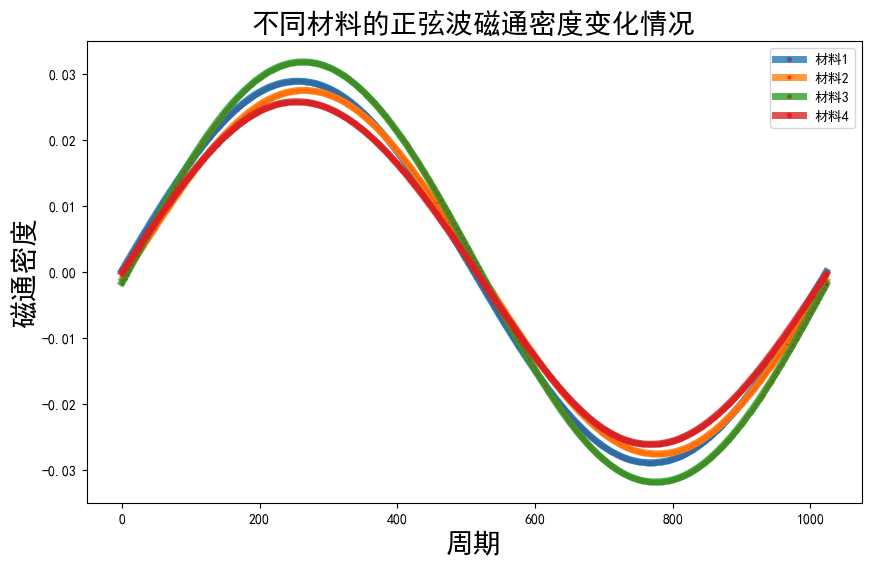

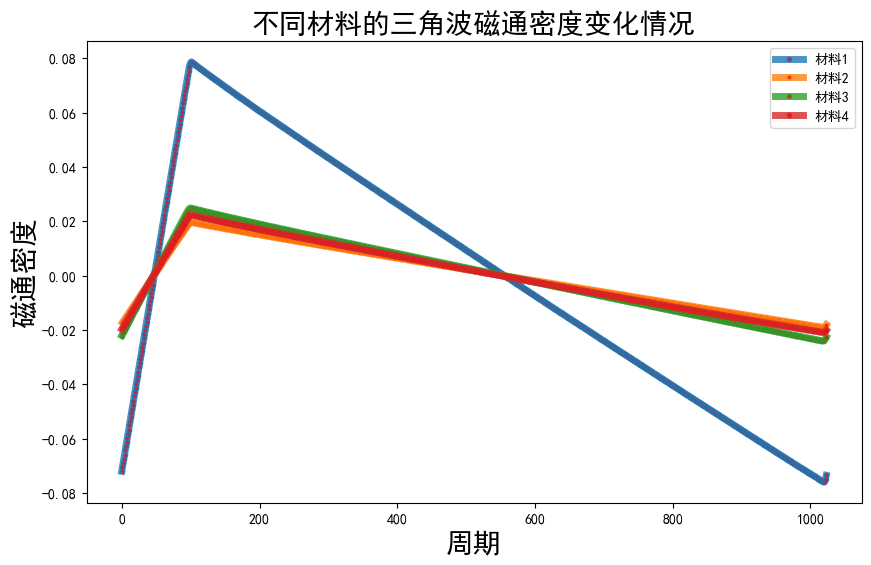

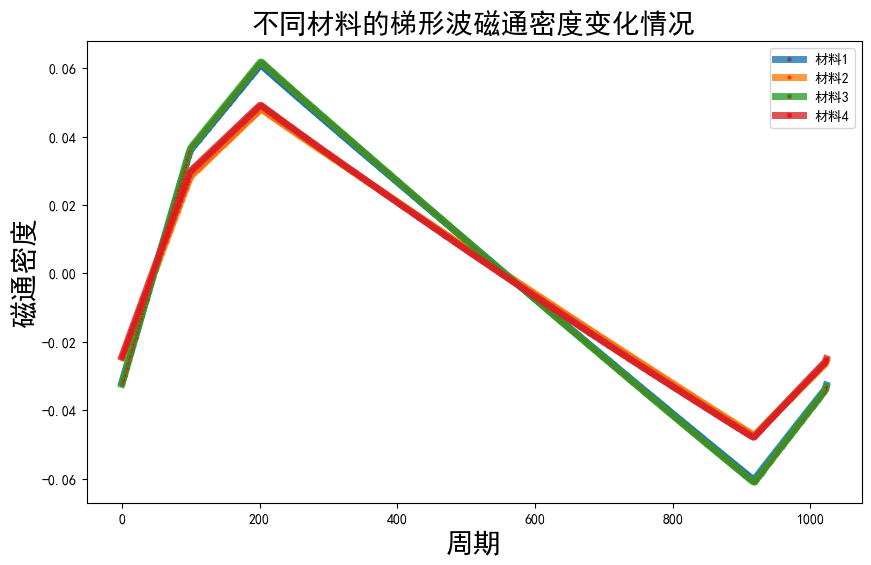

In [3]:
def img(name):
    col = all_data.columns[4:-2]
    mt1_bo1 = pd.Series(all_data[(all_data.磁芯材料=='材料1')&(all_data.励磁波形==name)][col].values[0])
    mt1_bo1.plot(kind = "line",figsize = (10,6),linestyle='-',marker='.',markerfacecolor='r',alpha=0.8,linewidth=5,label='材料1') #颜色,matplotlib

    mt2_bo1 = pd.Series(all_data[(all_data.磁芯材料=='材料2')&(all_data.励磁波形==name)][col].values[0])
    mt2_bo1.plot(kind = "line",figsize = (10,6),linestyle='-',marker='.',markerfacecolor='r',alpha=0.8,linewidth=5,label='材料2') #颜色,matplotlib

    mt3_bo1 = pd.Series(all_data[(all_data.磁芯材料=='材料3')&(all_data.励磁波形==name)][col].values[0])
    mt3_bo1.plot(kind = "line",figsize = (10,6),linestyle='-',marker='.',markerfacecolor='r',alpha=0.8,linewidth=5,label='材料3') #颜色,matplotlib

    mt4_bo1 = pd.Series(all_data[(all_data.磁芯材料=='材料4')&(all_data.励磁波形==name)][col].values[0])
    mt4_bo1.plot(kind = "line",figsize = (10,6),linestyle='-',marker='.',markerfacecolor='r',alpha=0.8,linewidth=5,label='材料4') #颜色,matplotlib

    plt.xticks(rotation=0)
    plt.title(f'不同材料的{name}磁通密度变化情况',fontsize = 20)
    plt.xlabel("周期",fontsize = 20)
    plt.ylabel("磁通密度",fontsize = 20)
    #plt.savefig(f'问题3\\不同材料的{name}磁通密度变化情况.png',dpi=500)
    plt.legend()
    plt.show()
img('正弦波')
img('三角波')
img('梯形波')

#### 可以看到，即使是对于同一种励磁波形，不同材料的磁通密度差别也是很大的，所以不同材料不同励磁波形共同决定着磁通密度的变化，而着又直接影响到磁芯损耗

#### 下面，我们按照问题1的特征提取方式，提取出不同材料、不同励磁波形的磁通密度特征，然后再进行X之间的联合分析

In [4]:
from scipy.stats import skew, kurtosis
col = all_data.columns[4:-2]

features = all_data[col]  # 第5列到最后一列为磁通密度曲线

# 计算每个样本的统计特征：均值、标准差、最大值、最小值、幅度、能量、偏度、峰度
features['mean'] = features.mean(axis=1)
features['std'] = features.std(axis=1)
features['max'] = features.max(axis=1)
features['min'] = features.min(axis=1)
features['amplitude'] = features['max'] - features['min']
features['energy'] = np.sum(np.square(features), axis=1)

# 计算偏度和峰度
features['skewness'] = features.apply(lambda row: skew(row), axis=1)
features['kurtosis'] = features.apply(lambda row: kurtosis(row), axis=1)
df = pd.concat([all_data[['磁芯损耗，w/m3','温度，oC','励磁波形','磁芯材料']],features[['mean',        'std',        'max',
              'min',  'amplitude',     'energy',   'skewness',   'kurtosis']]],axis=1)
df

,磁芯损耗，w/m3,温度，oC,励磁波形,磁芯材料,mean,std,max,min,amplitude,energy,skewness,kurtosis
0,1997.955250,25,正弦波,材料1,-4.003906e-11,0.020400,0.028849,-0.028840,0.057689,0.431564,5.267669,981.676609
1,2427.749830,25,正弦波,材料1,-2.539063e-11,0.022223,0.031419,-0.031427,0.062846,0.512148,6.278220,986.741855
2,3332.725760,25,正弦波,材料1,-9.765626e-13,0.025107,0.035535,-0.035513,0.071047,0.653674,7.925085,991.497062
3,4502.908007,25,正弦波,材料1,-5.859375e-11,0.028263,0.040015,-0.040025,0.080041,0.828362,9.732830,993.901001
4,6063.023248,25,正弦波,材料1,4.101562e-11,0.031812,0.045028,-0.045085,0.090113,1.049504,11.703556,994.473776
...,...,...,...,...,...,...,...,...,...,...,...,...
12395,20604.900210,90,梯形波,材料4,-4.980469e-11,0.021164,0.034867,-0.034180,0.069047,0.466282,5.724354,984.381578
12396,26504.284280,90,梯形波,材料4,-6.835938e-12,0.023316,0.038341,-0.037582,0.075923,0.565880,6.936508,989.140291
12397,46232.491530,90,梯形波,材料4,-7.812500e-11,0.029728,0.048877,-0.047934,0.096811,0.919916,10.598579,994.427468
12398,61458.085900,90,梯形波,材料4,6.347656e-11,0.033376,0.054889,-0.053880,0.108769,1.159580,12.577748,994.234786


#### 不同材料的平均磁芯损耗

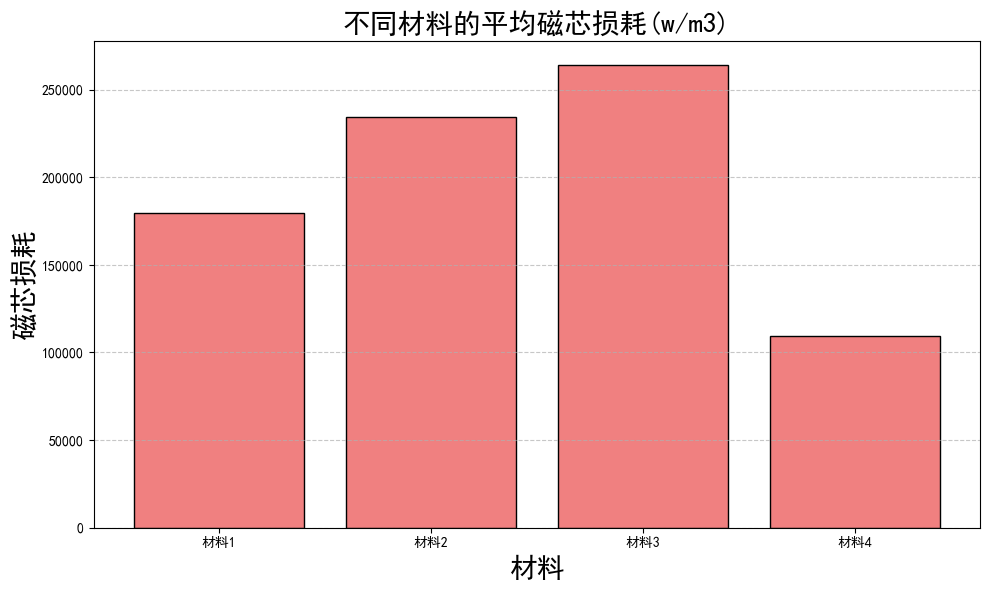

In [5]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = df.groupby('磁芯材料')['磁芯损耗，w/m3'].mean()
# 创建条形图
plt.figure(figsize=(10, 6))
plt.bar(data.index, data.values, color='lightcoral', edgecolor='black')
# 添加标题和标签
plt.title('不同材料的平均磁芯损耗(w/m3)', fontsize=20, fontweight='bold')
plt.xlabel('材料', fontsize=20)
plt.ylabel('磁芯损耗', fontsize=20)
# 美化图表
plt.grid(axis='y', linestyle='--', alpha=0.7)
#plt.savefig(f'问题3\\不同材料的磁芯损耗.png', bbox_inches='tight')
# 显示图表
plt.tight_layout()
plt.show()

#### 不同励磁波形的平均磁芯损耗

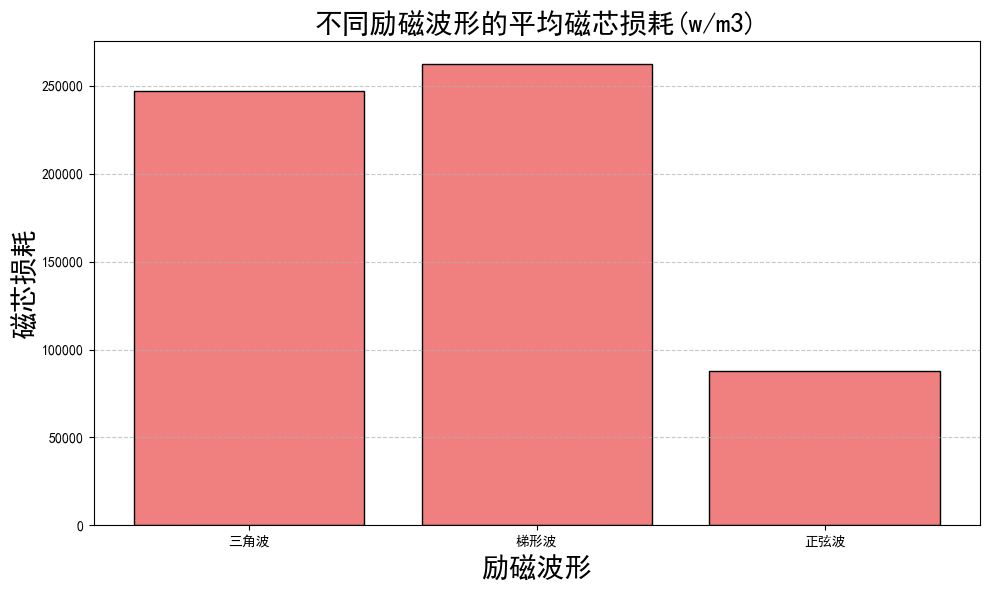

In [6]:
data = df.groupby('励磁波形')['磁芯损耗，w/m3'].mean()
# 创建条形图
plt.figure(figsize=(10, 6))
plt.bar(data.index, data.values, color='lightcoral', edgecolor='black')
# 添加标题和标签
plt.title('不同励磁波形的平均磁芯损耗(w/m3)', fontsize=20, fontweight='bold')
plt.xlabel('励磁波形', fontsize=20)
plt.ylabel('磁芯损耗', fontsize=20)
# 美化图表
plt.grid(axis='y', linestyle='--', alpha=0.7)
#plt.savefig(f'问题3\\不同励磁波形的磁芯损耗.png', bbox_inches='tight')
# 显示图表
plt.tight_layout()
plt.show()

#### 对于X的内部相互影响，我们使用相关性分析进行联合分析，这里不考虑励磁波形和材料两个分类变量

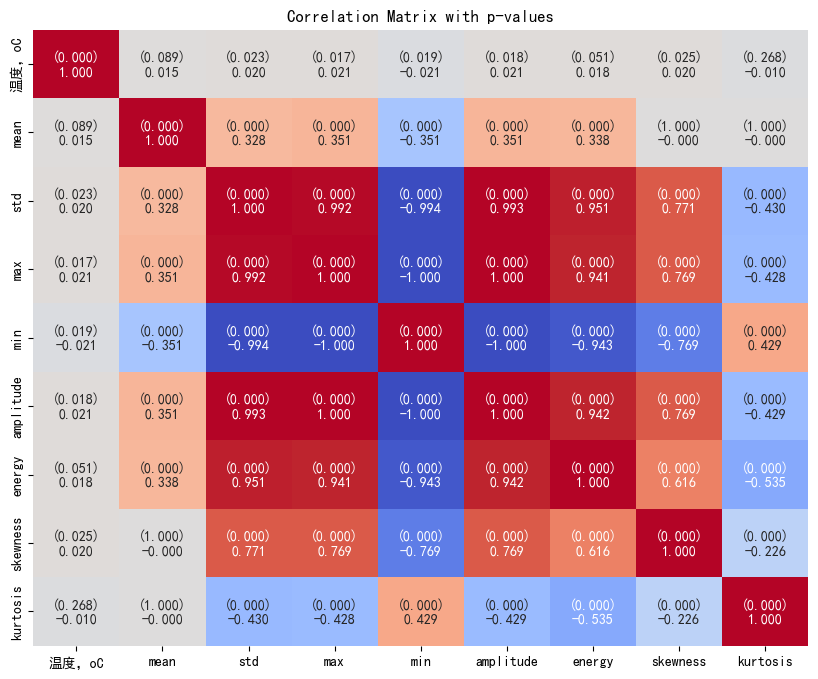

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
def correlation_matrix_with_p_values(X):
    cols = X.columns
    # 初始化显示矩阵，用来存储格式化的 (p值)相关系数
    display_matrix = np.empty((len(cols), len(cols)), dtype=object)
    display_matrix_values = np.empty((len(cols), len(cols)), dtype=object)

    # 计算相关系数和p值
    for i in range(len(cols)):
        for j in range(len(cols)):
            # 计算相关系数和p值
            corr, pval = pearsonr(X[cols[i]].dropna(), X[cols[j]].dropna())
            # 格式化结果为 (p值)相关系数
            display_matrix[i, j] = f"({pval:.3f})\n{corr:.3f}"
            display_matrix_values[i, j] = round(corr,3)

    # 将矩阵转为 DataFrame
    display_df = pd.DataFrame(display_matrix, index=cols, columns=cols)
    display_df_values = pd.DataFrame(display_matrix_values, index=cols, columns=cols)

    # 画热力图（不带数值显示，因为显示的数据由我们格式化）
    plt.figure(figsize=(10, 8))
    sns.heatmap(display_df_values.astype('float'), annot=display_df, fmt='', cmap='coolwarm', cbar=False)
    plt.title('Correlation Matrix with p-values')
    plt.savefig(f'问题3\\X内部相关性系数及其P值.png', bbox_inches='tight')
    plt.show()
# 使用函数


col = ['温度，oC', 'mean', 'std', 'max', 'min',
       'amplitude', 'energy', 'skewness', 'kurtosis']
X = df[col]
X = X.fillna(X.mean(axis=0))
correlation_matrix_with_p_values(X)


### 基于因果推断的磁芯损耗分析

这个因果推断方法的原理基于 **后门准则（Backdoor Criterion）** 和 **平均处理效应（ATE）** 的估计，主要步骤如下：

### 1. **后门准则 (Backdoor Criterion)**:
后门准则用于识别并控制混淆变量（即同时影响处理变量和结果变量的变量）。通过控制这些混淆变量，可以消除它们对因果关系的干扰，从而更准确地估计处理变量对结果变量的直接因果效应。

### 2. **平均处理效应 (ATE)**:
这个方法的目标是估计 **平均处理效应**（Average Treatment Effect, ATE），即处理变量 `X` 对结果变量 `Y` 的平均影响。在模型中，ATE 是通过分析处理变量变化引起的结果变量的变化来衡量的。

### 3. **回归模型**:
该方法使用回归模型（如线性回归），其中处理变量 `X` 和混淆变量 `Z` 一起被包含在回归方程中，通过这种方式控制混淆因素对结果的影响，从而估计 `X` 对 `Y` 的因果效应。

### 4. **稳健性检验**:
为了验证估计结果的可靠性，方法引入了一个反事实检验（如添加一个随机共同原因）来评估估计是否受到遗漏变量的影响。如果引入随机混淆变量后，估计效应变化不大，则说明模型的估计结果是稳健的。

### 核心思想：
- **控制混淆变量**：通过识别并控制混淆变量，消除它们对因果效应的干扰。
- **估计ATE**：利用回归等方法，计算处理变量对结果变量的平均因果效应。
- **验证稳健性**：通过反事实检验，验证模型估计的可靠性。

这个方法的核心在于结合统计推断与因果推断理论，通过控制混淆因素来确保因果效应的准确估计，并检验结果的稳健性。

#### 特别的，我们对比类别变量进行顺序化处理，按照总体损耗大小进行顺序标签

In [8]:
# 定义函数用于基于Y的值对X进行顺序标签化
def label_by_numeric_order(data, categorical_col, numeric_col):
  
    # Step 1: 基于数值列计算每个分类类别的均值，并排序
    mean_values = data.groupby(categorical_col)[numeric_col].mean().sort_values()

    # Step 2: 为每个类别分配顺序标签
    ordered_labels = {category: rank for rank, category in enumerate(mean_values.index, 1)}

    # Step 3: 将标签应用到原数据
    data[f'{categorical_col}_ordered'] = data[categorical_col].map(ordered_labels)

    return data[f'{categorical_col}_ordered'].values
label_by_numeric_order(df,'励磁波形','磁芯损耗，w/m3')

array([1, 1, 1, ..., 3, 3, 3], dtype=int64)

### 因果效应建模，特别的，我们将每一个影响因素作为X，剩余的作为混淆变量，从而分析每个变量单独的对Y的影响

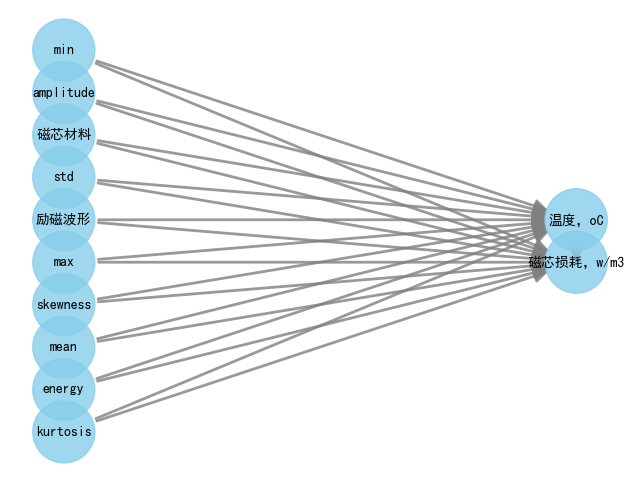

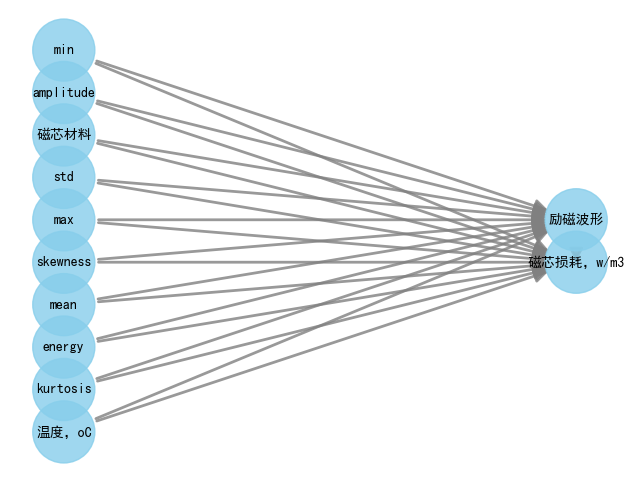

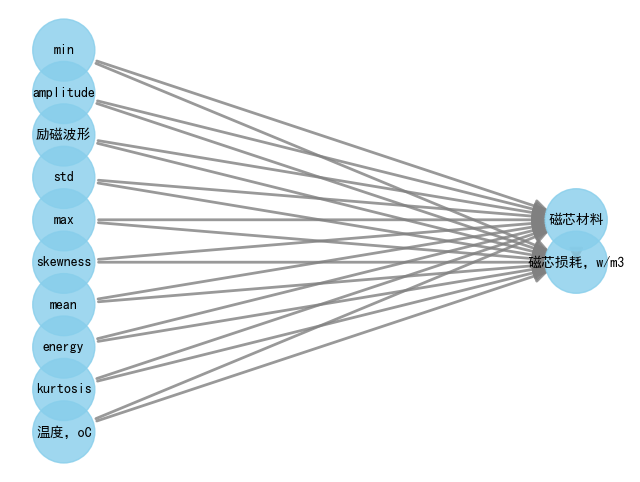

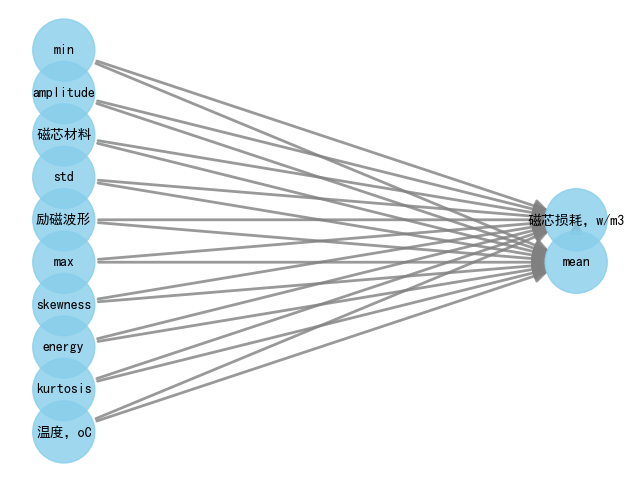

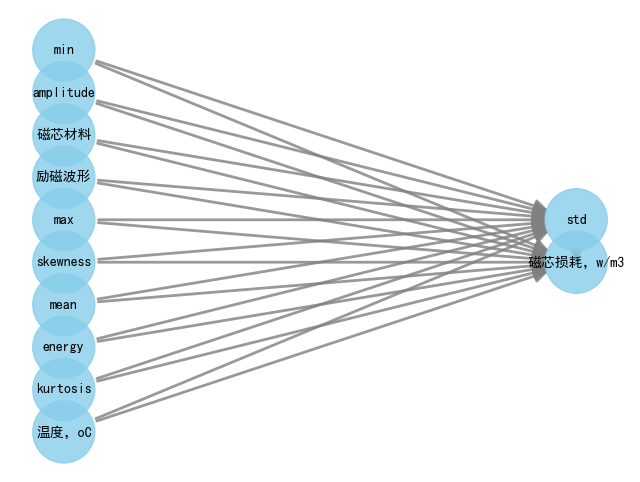

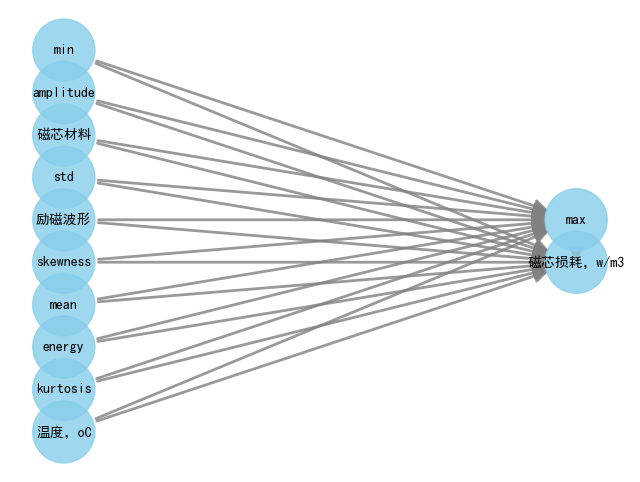

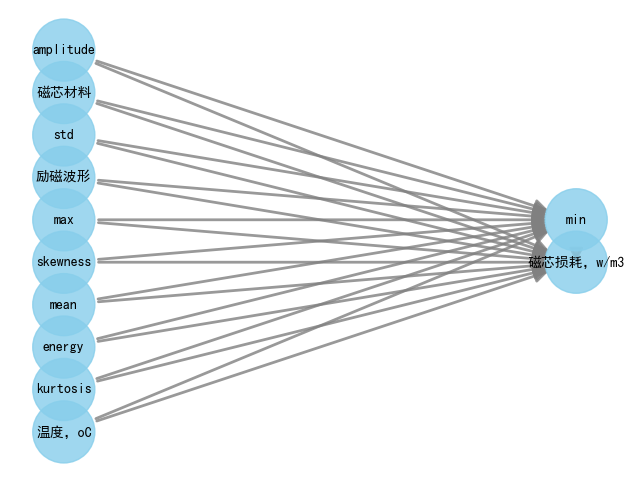

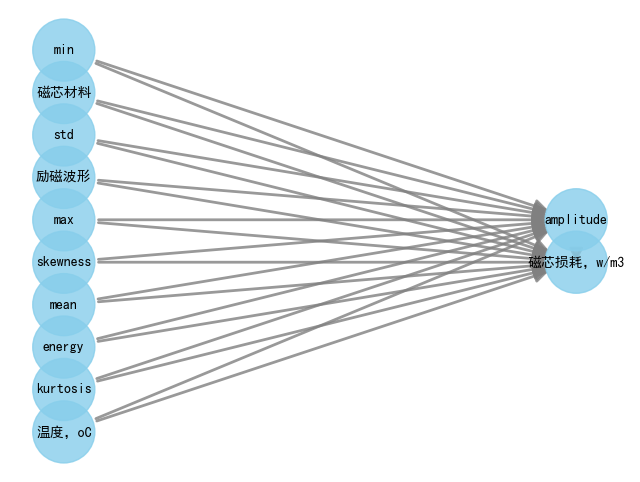

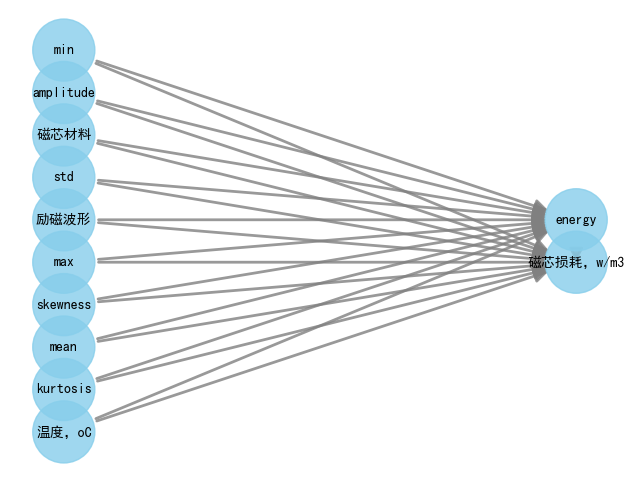

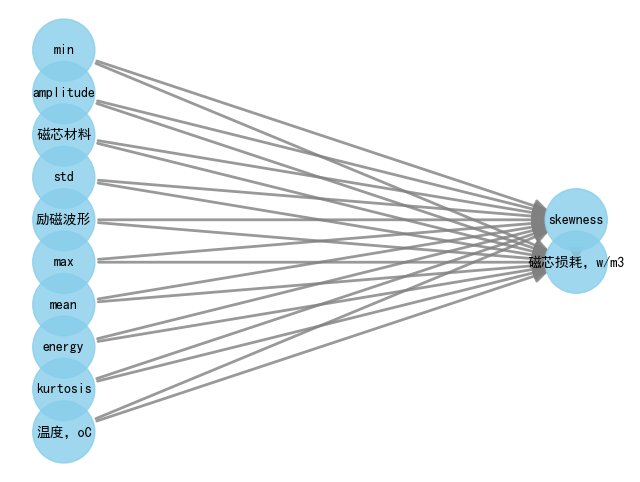

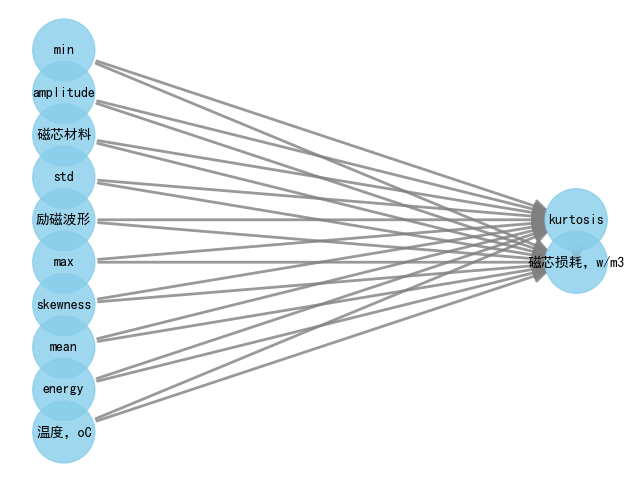

In [9]:
import numpy as np
import pandas as pd
import dowhy
from dowhy import CausalModel

total_result = pd.DataFrame()
col = ['温度，oC', '励磁波形', '磁芯材料', 'mean', 'std', 'max', 'min', 'amplitude',
       'energy', 'skewness', 'kurtosis']
for ori_X in col:
    df['励磁波形'] = label_by_numeric_order(df,'励磁波形','磁芯损耗，w/m3')
    df['磁芯材料'] = label_by_numeric_order(df,'磁芯材料','磁芯损耗，w/m3')
    df['kurtosis'] = df['kurtosis'].fillna(df['kurtosis'].mean())
    df['skewness'] = df['skewness'].fillna(df['skewness'].mean())
    df = df.astype('float')

    Y_col = '磁芯损耗，w/m3'
    X_col = ori_X
    Z_col = [i for i in col if i != ori_X]


    # Step 1: 构造示例数据集
    # 假设 X 是处理变量（连续），Y 是结果变量，Z 是潜在混淆变量
    np.random.seed(42)


    # Step 2: 构建因果模型
    model = CausalModel(
        data=df,
        treatment=X_col,
        outcome=Y_col,
        common_causes=Z_col  # 可能的混淆变量
    )

    # Step 3: 打印因果模型图
    model.view_model()

    # Step 4: 进行因果推断
    # 使用线性回归法来估计因果效果，适用于连续处理变量
    identified_estimand = model.identify_effect()
    estimate = model.estimate_effect(identified_estimand, method_name="backdoor.linear_regression")

    # Step 5: 验证结果
    # 通过反事实分析验证结果的合理性
    refute_results = model.refute_estimate(identified_estimand, estimate, method_name="random_common_cause")


    estimate_value = estimate.value
    refute_results = model.refute_estimate(identified_estimand, estimate, method_name="random_common_cause")
    new_effect = refute_results.new_effect
    p_value = refute_results.refutation_result['p_value']

    # 创建包含估计和反事实验证结果的数据
    results_data = {
        '检测变量': [ori_X],
        'Mean Value': [estimate_value],
        'New Effect': [new_effect],
        'p-value': [p_value]
    }


    df_results = pd.DataFrame(results_data)
    total_result = pd.concat([total_result,df_results])
#total_result.to_excel('问题3\\因果效应结果.xlsx',index=False)

3. Estimate
Mean value: -0.0409：估计的平均处理效应的数值为 -0.0409。这意味着，在控制混淆变量 Z 后，每单位 X 的变化会使 Y 的平均值减少约 0.0409。由于这个值接近于 0，说明 X 对 Y 的影响很小，几乎可以忽略不计。
4. Refute: Add a random common cause
为了验证结果的稳健性，这部分进行了 反事实检验，通过添加一个随机的共同原因（即模拟一个与 X 和 Y 都相关的假设变量）来验证估计是否发生显著变化。

Estimated effect: -0.0409：原始估计效应与上面估计一致。

New effect: -0.0411：引入随机混淆因子后，新的估计效应几乎没有变化（从 -0.0409 变为 -0.0411），说明模型对混淆因子的引入非常稳健，估计结果没有显著变化。

p value: 0.84：p 值为 0.84，远大于 0.05，这表明引入随机混淆因子后效应的变化不显著，进一步支持了原始因果推断结果的稳健性。